In [1]:
rm(list=ls())
library(car)
file = "D:/2019 Fall/STAT 628/module 2"
setwd(file)
data = read.csv("BodyFat.csv")[,-c(1,2)]

Loading required package: carData


According to the relationship of DENSITY and BODYFAT is determined, we take DENSITY as response variable.

### Check missing values

In [2]:
max(is.na(data))

[1] 0

As the command returns a 0, there is no misiing value in this data set.

### Dimension of data

In [4]:
n = nrow(data); p = ncol(data[,-1])
cat("This data(X) is a ",n,"x",p," matrix.",sep="" )

This data(X) is a 252x14 matrix.

### Visualization of target vectors

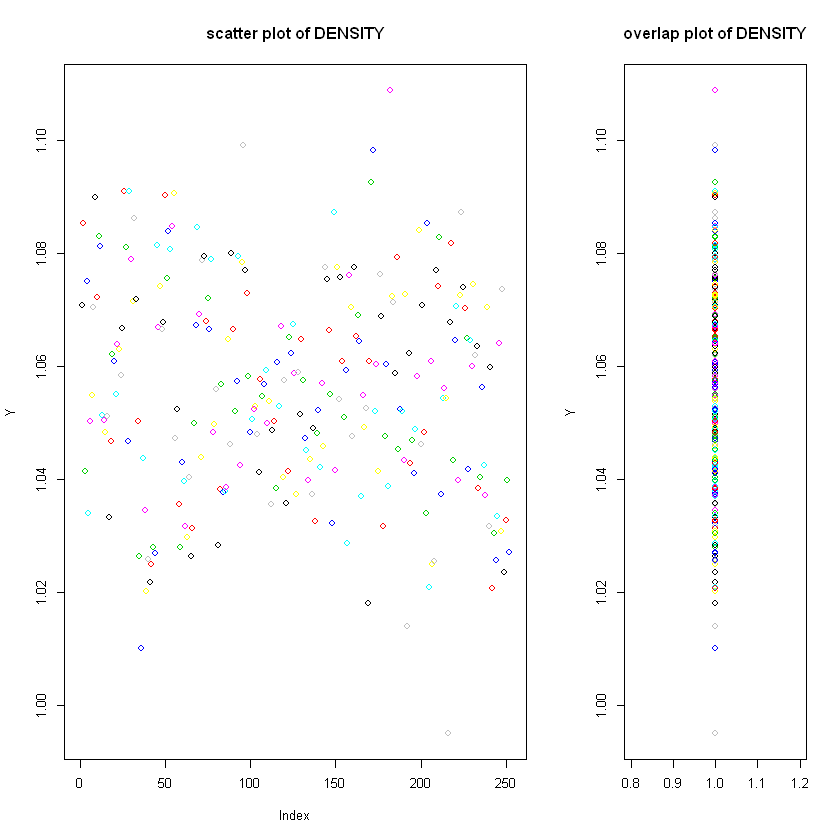

In [6]:
Y = data$DENSITY
mat = matrix(c(1,1,2),nrow=1)
layout(mat)
plot(data$DENSITY,col=1:n,ylab="Y",main="scatter plot of DENSITY")
plot(rep(1,n),data$DENSITY,col=1:n,xlab="",ylab="Y",main="overlap plot of DENSITY",xlim=c(0.8,1.2))

From pictures above, the target vector can be considered as a continuous variable.

Consider a linear reression model in this case. 

### Outliers detection

From an original linear regression model, use three methods below for testing outliers together:

1. remove data points whose standardized residuals' absolute values are greater than 2;

2. remove data points with Cook's distances greater than $\frac{4}{n-p}$;

3. apply outlierTest function in the car package.

Stop detection when the outlierTest function returns no outliers under Bonferroni test..

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
96  3.62241         0.00035732     0.090044

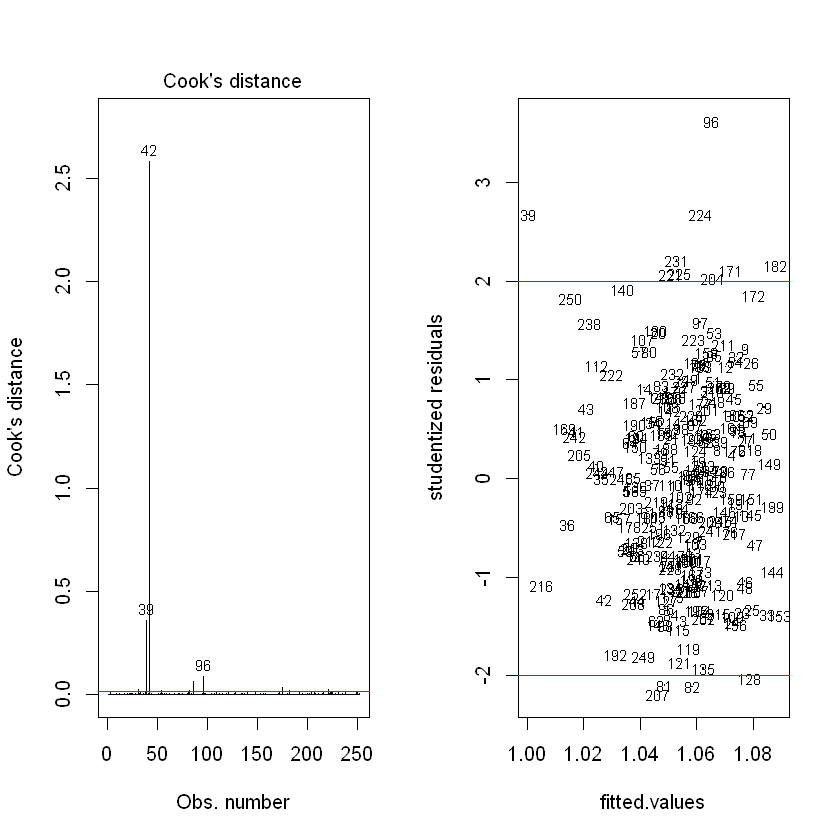

In [7]:
m = lm(data$DENSITY~.,data)
# test outliers 
plot.outlier=function(model,data){
  n = nrow(data)
  p = ncol(data)
  par(mfrow=c(1,2))
  plot(model,4)
  abline(h=4/(n-p),col="red")
  plot(x=model$fitted.values,y=rstudent(model),pch=".",
       xlab="fitted.values",ylab="studentized residuals")
  text(x=model$fitted.values,y=rstudent(model),labels=1:nrow(data),cex=0.75)
  abline(h=2,col="red")
  abline(h=-2,col="red")
  outlierTest(model)
}

plot.outlier(m,data)
index = c(39,42,96,224)
data = data[-index,]

In the progress above, 4 outliers are removed.

Now have a look at cleaned data.

In [9]:
cat("This data(X) is a ",nrow(data),"x",ncol(data[,-1])," matrix.",sep="" )

This data(X) is a 248x14 matrix.

Write the new data into a csv file. (As we have done so, don't run the last cell.)

In [7]:
# write.csv(data,"data.cleaned.csv")